In [1]:
# Setup notebook
from learntools.time_series.style import *  # plot style settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}
store_sales = pd.read_csv(
    'store-sales-time-series-forecasting\\train.csv',
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True, # pandas csv tarih formatını okurken eğer okuma uzun sürecekse daha hızlı bir yönteme geçer
)

store_sales = store_sales.set_index('date').to_period('D') # DatetimeArray/Index to PeriodArray/Index
# eğer M (month) yazılsaydı tarih 1978-03 şeklinde olucaktı yani sadece yıl ve ay alınacaktı
# eğer data'mızın içinde saat bilgi de olsaydı onu kesmemize yardımcı olabilirdi
store_sales = store_sales.set_index(['store_nbr', 'family'], append=True)
average_sales = store_sales.groupby('date').mean()['sales']

Fit a time-step feature

In [2]:
df = average_sales.to_frame()

# Create a time dummy
time = np.arange(len(df.index))

df['time'] = time

# Create training data
X = df.loc[:, ['time']]  # features
y = df.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

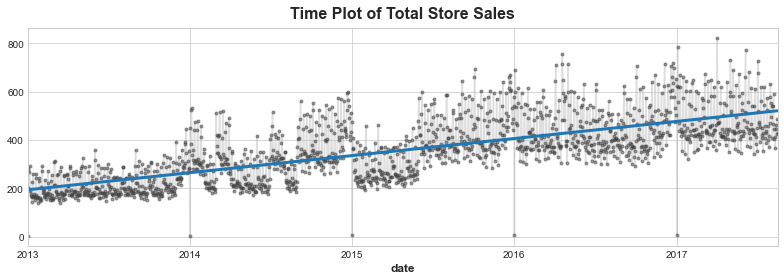

In [3]:
ax = y.plot(**plot_params, alpha=0.5) # alpha, saydamlık
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

Fit a lag feature to Store Sales

In [4]:
df = average_sales.to_frame()

# Create a lag feature from the target 'sales'
lag_1 = df['sales'].shift(1)

df['lag_1'] = lag_1  # add to dataframe

X = df.loc[:, ['lag_1']].dropna()  # features
y = df.loc[:, 'sales']  # target

y, X = y.align(X, join='inner')  # drop corresponding values in target

# Create a LinearRegression instance and fit it to X and y.
model = LinearRegression().fit(X, y)

# Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

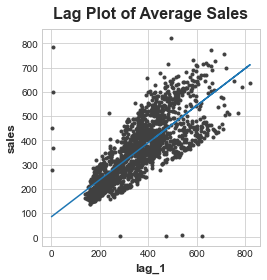

In [5]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');

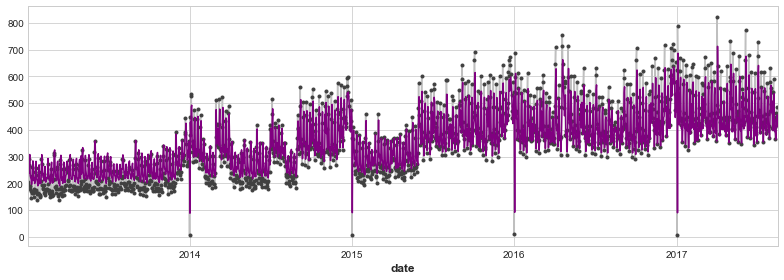

In [6]:
ax = y.plot(**plot_params)
ax = y_pred.plot(color='purple')
# aşağıdaki zaman çizelgesi, tahminlerin yakın geçmişteki dizi davranışına nasıl tepki verdiğini bize gösteriyor. ne kadar iyi tahmin edebildiğimizin gösteriyor daha doğrusu